# Лабораторная Работы 2: Восстановление путей
Максим Макридин и Константин Чернышев


## Auxiliary functions 

In [1]:
import matplotlib.pyplot as plt
import timeit
import numpy as np
import random

%matplotlib inline

In [3]:
def moving_average_(x, y):
    bin_centers = []
    bin_avg = []

    items = []
    last_x = x[0]
    for i, item in enumerate(y):        
        if last_x == x[i]:
            items.append(item)
        else:
            bin_avg.append(np.mean(items))
            bin_centers.append(last_x)
            last_x = x[i]
            items = [item]

    bin_avg.append(np.mean(items))
    bin_centers.append(x[-1])

    # smooth res 
    smooth_k = 0.3
    for i in range(1, len(bin_centers)-1):
        bin_avg[i] = (bin_avg[i-1] + bin_avg[i] + bin_avg[i+1]) / 3 * smooth_k + bin_avg[i] * (1- smooth_k)

    return bin_centers, bin_avg


def draw_data_and_average(x, y, colour='b', label='', linestyle='solid'):
    #plot the moving average
    # bins, average = moving_average(x, y, step_size=find_min_diff(x)/10, bin_size=find_min_diff(x))
    bins, average = moving_average_(x, y)
    
    # plt.scatter(x, y, colour, alpha=0.4, linewidths=0.5, label=(label+'_data'))
    plt.scatter(x, y, color=colour, alpha=0.4, label=label, linestyle=linestyle, marker='o')
    plt.plot(bins, average, colour, ms=1, linestyle=linestyle)
    plt.legend()


([100, 200, 300, 400, 600, 700, 800], [-0.5013266543486855, -0.912201945429095, -1.1676270699163251, -0.8067150758741456, -0.021700421705149655, 0.9412950583317726, 1.040964659585137])


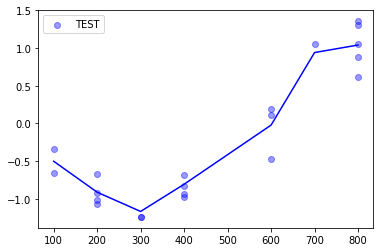

In [4]:
x = [100, 100, 200, 200, 200, 200, 300, 300, 400, 400, 400, 400, 600, 600, 600, 700, 800, 800, 800, 800, 800]
noise = np.random.normal(scale=0.3,size=len(x))
y = np.sin(x) + noise


print(moving_average_(x, y))
draw_data_and_average(x, y, 'b', 'TEST')

In [5]:
import time 

# def timeit(func, rep=100) -> list:
    # res = []
    # for i in range(rep):
        # t = time.time()
        # func()
        # res.append(time.time() - t)
    # 
    # return res

def timeit(func) -> list:
    t = time.time()
    func()
    return time.time() - t
    

## Некоторые вводные

Для удобства работы с графикой и скорости работы алгоритмов - все функции реализованы на языке `c++17` и обёрнуты в `cython`, после чего 
скомпилированна и может быть подключена как обычный модуль `.so`.

Для кождого из алгоритмов проведем две серии экспериментов - для плотных и разреженных графов.   
Везде далее - Линия обозначает среднее, точки - точные значения в каждом эксперименте. 

Алгоритмы с подписью `set` обозначают, что внутри ипользуется Алгоритм Дейкстры с использованием set, 
а не наивная реализация. (Что дает сложность $O((E+V) log V)$)

In [ ]:
import random
import math
from graph_python import PyGraph, PyGraphGenerator, Dijkstra, DijkstraSet, BiDijkstra, BellmanFord, FloydWarshall, Johnson, JohnsonSet, Seidel, A_star


## All-to-all shortest paths 

In [20]:
algos = {'FloydWarshall': FloydWarshall, 'Johnson': Johnson, 'JohnsonSet': JohnsonSet, 'Seidel': Seidel}

time_thin_a2a = {title:[] for title in algos}
time_dense_a2a = {title:[] for title in algos}

sizes = []

for n in range(10, 1111, 100):  # Graph sizes
    print(n)
    for _ in range(10):  # repetition 
        sizes.append(n)
        graph_thin = PyGraph(n)
        num = random.randint(n - 1, int(n*math.sqrt(n)))
        PyGraphGenerator.build_by_number(graph_thin, num)
        
        for title in algos:
            time_thin_a2a[title].append(timeit(lambda : algos[title](graph_thin)))

        graph_dense = PyGraph(n)
        num = random.randint(int(n*math.sqrt(n)), int(n*(n-1)/2))
        PyGraphGenerator.build_by_number(graph_dense, num)

        for title in algos:
            time_dense_a2a[title].append(timeit(lambda : algos[title](graph_dense)))

10
110
210
310
410
510
610
710
810
910
1010
1110


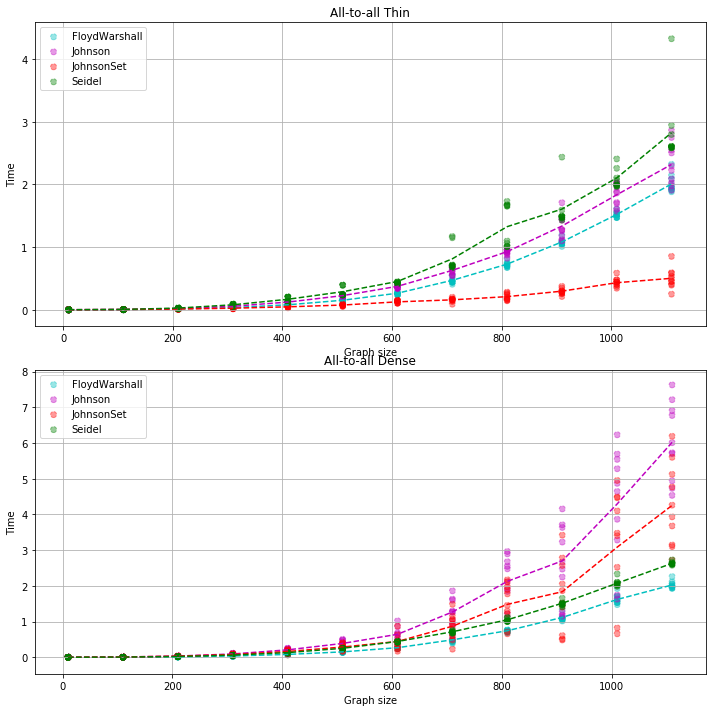

In [29]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
for colour, title in zip(['c', 'm', 'r', 'g'], algos): 
    draw_data_and_average(sizes, time_thin_a2a[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('All-to-all Thin')
# plt.labels()

plt.subplot(2, 1, 2)
for colour, title in zip(['c', 'm', 'r', 'g'], algos): 
    draw_data_and_average(sizes, time_dense_a2a[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('All-to-all Dense')
# plt.labels()

plt.show()

## One-to-one


In [10]:

# TODO: A*
algos = {'Dijkstra': Dijkstra, 'DijkstraSet': DijkstraSet, 'BellmanFord': BellmanFord, 'A_star': A_star, 'BiDijkstra': BiDijkstra}

time_thin_o2o = {title:[] for title in algos}
time_dense_o2o = {title:[] for title in algos}

sizes = []

for n in range(10, 1111, 100):  # Graph sizes
    print(n)
    for _ in range(10):  # repetition 
        sizes.append(n)
        src = random.randint(0, n-1)
        target = random.randint(0, n-1)
        def simple_heur(vertex: int):
            return 1
        
        graph_thin = PyGraph(n)
        num = random.randint(n - 1, int(n*math.sqrt(n)))
        PyGraphGenerator.build_by_number(graph_thin, num)
        
        for title in algos:
            if title == 'A_star':
#                 pass
                time_thin_o2o[title].append(timeit(lambda : algos[title](graph_thin, src, target, simple_heur)))  # TODO: scr - target 
            elif title == 'BiDijkstra':
                time_thin_o2o[title].append(timeit(lambda : algos[title](graph_thin, src, target)))  # TODO: scr - target 
            else:
                time_thin_o2o[title].append(timeit(lambda : algos[title](graph_thin, src)))  # TODO: scr - target 
#             time_thin['BiDijkstra'] = BiDijkstra(graph_thin, src, target)
        
        graph_dense = PyGraph(n)
        num = random.randint(int(n*math.sqrt(n)), int(n*(n-1)/2))
        PyGraphGenerator.build_by_number(graph_dense, num)

        for title in algos:
            if title == 'A_star':
                time_dense_o2o[title].append(timeit(lambda : algos[title](graph_dense, src, target, simple_heur)))  # TODO: scr - target 
            elif title == 'BiDijkstra':
                time_dense_o2o[title].append(timeit(lambda : algos[title](graph_dense, src, target)))  # TODO: scr - target 
            else:
                time_dense_o2o[title].append(timeit(lambda : algos[title](graph_dense, src)))  # TODO: scr - target 


10
110
210
310
410
510
610
710
810
910
1010
1110


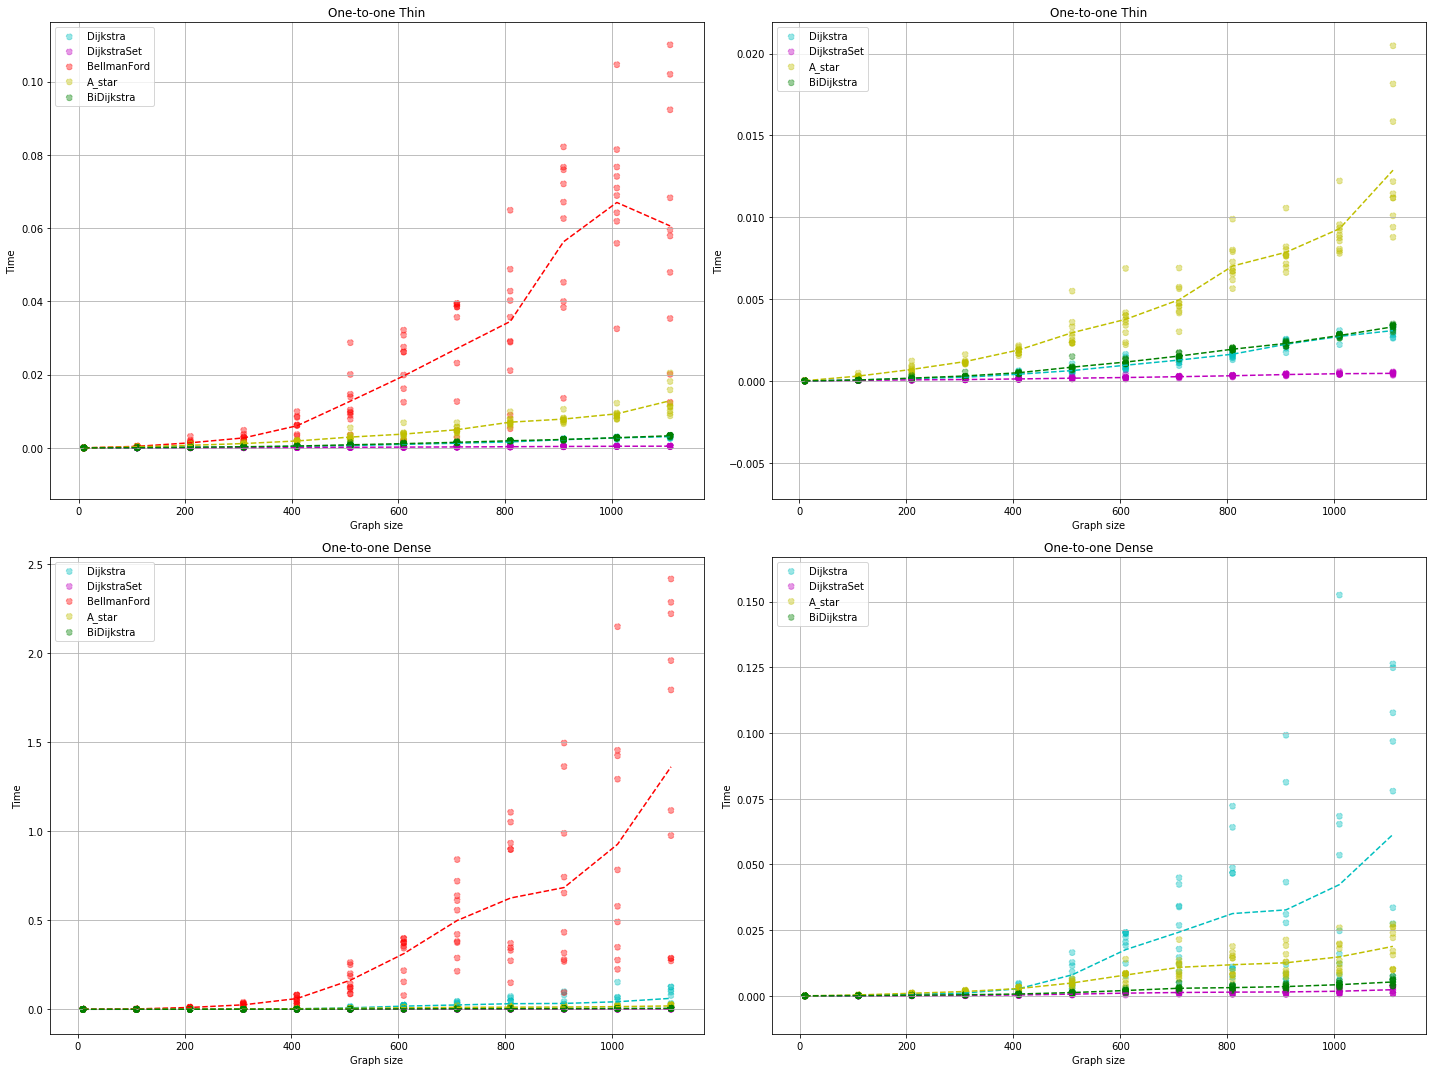

In [12]:
plt.figure(figsize=(20, 15))
plt.ylim(0)

plt.subplot(2, 2, 1)
for colour, title in zip(['c', 'm', 'r', 'y', 'g'], algos): 
    draw_data_and_average(sizes, time_thin_o2o[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Thin')
# plt.labels()

plt.subplot(2, 2, 2)
for colour, title in zip(['c', 'm', 'y', 'g'], ['Dijkstra', 'DijkstraSet', 'A_star', 'BiDijkstra']): 
    draw_data_and_average(sizes, time_thin_o2o[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Thin')
# plt.labels()

plt.subplot(2, 2, 3)
for colour, title in zip(['c', 'm', 'r', 'y', 'g'], algos): 
    draw_data_and_average(sizes, time_dense_o2o[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Dense')
# plt.labels()

plt.subplot(2, 2, 4)
for colour, title in zip(['c', 'm', 'y', 'g'], ['Dijkstra', 'DijkstraSet', 'A_star', 'BiDijkstra']): 
    draw_data_and_average(sizes, time_dense_o2o[title], colour=colour, label=title, linestyle='dashed')
plt.xlabel('Graph size')
plt.ylabel('Time')
plt.grid(True)
plt.tight_layout()
plt.title('One-to-one Dense')
# plt.labels()

plt.show()

Интересное наблюдение: Для плотных графов примерно одинакого себя показывают 
Алгоритм Дейкстры с Сетом и Алгоритм Зейделя. Хотя по абсолютно разным причинам.

## Path reconstruction

В силу ~~какой-то магии~~ необъяснимых технических особенностей Cython, нам не удалось заставить его корректно обрабатывать полученную для алгоритма Зейделя матрицу "предшественников", поэтому функция восстановления путей работает только в `C++`-части этой лабораторной.

### Пример

code:
```c++
    Graph graph1{6};
    std::vector<Edge> edges1{{0, 1, 1},
                             {0, 2, 1},
                             {1, 2, 1},
                             {2, 4, 1},
                             {1, 3, 1},
                             {3, 5, 1}};
    graph1.build_unweighted(edges1);
    
    std::vector<std::vector<int64_t>> lengths{};
    std::vector<std::vector<size_t>> preds{};

    Seidel(graph1, lengths, preds, true);

    for (std::vector<int64_t> &i : lengths) {
        for (int64_t j : i) std::cout << j << " ";
        std::cout << std::endl;
    }

    std::cout << std::endl;

    for (std::vector<size_t> &i : preds) {
        for (int64_t j : i) std::cout << j << " ";
        std::cout << std::endl;
    }
```
output:
```
0 1 1 2 2 3 
1 0 1 1 2 2 
1 1 0 2 1 3 
2 1 2 0 3 1 
2 2 1 3 0 4 
3 2 3 1 4 0 

0 1 2 1 2 1 
0 0 2 3 2 3 
0 1 0 1 4 1 
1 1 1 0 1 5 
2 2 2 2 0 2 
3 3 3 3 3 0
```

Для алгоритма A* восстановление пути удалось реализовать в Python:
code:
```python3
graph1 = PyGraph(6)
graph1.build_unweighted([[0, 1, 1],
                         [0, 2, 1],
                         [1, 2, 1],
                         [2, 4, 1],
                         [1, 3, 1],
                         [3, 5, 1]])

def simple_heur(vertex: int):
    return 1

length, preds = A_star(graph1, 4, 3, simple_heur, True)
print(length)
print(preds)
```
output:
```
3
[3, 1, 2, 4]
```
Можно заметить, что, т.к. граф в примере выше - точно такой же, как и в этом примере, поэтому длина пути, найденного алгоритмом A\*, совпадает с найденной алгоритмом Зейделя, и путь, восстановленный алгоримом A\*, совпадает с путём, восстановленным алгоритмом Зейделя.